In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

c:\Users\user\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
median = df['salary_year_avg'].median()
asd = df['salary_hour_avg'].median()
df_filled = df
df_filled['salary_year_avg'] = df_filled['salary_year_avg'].fillna(median)
df_filled['salary_hour_avg'] = df_filled['salary_hour_avg'].fillna(asd)
df_filled.loc[:10, 'salary_year_avg':'salary_hour_avg']

,salary_year_avg,salary_hour_avg
0,115000.0,45.98
1,115000.0,45.98
2,115000.0,45.98
3,115000.0,45.98
4,115000.0,45.98
5,115000.0,45.98
6,115000.0,45.98
7,115000.0,45.98
8,115000.0,45.98
9,115000.0,45.98


In [3]:
qwe = df_filled
qwe = qwe.drop_duplicates()
print('Original number:     ', len(df_filled))
print('After dropping:      ', len(qwe))
print('Dropped values:      ', len(df_filled)-len(qwe))

Original number:      785741
After dropping:       785640
Dropped values:       101


In [4]:
df.pivot_table(values='salary_year_avg', index='job_country', columns='job_title_short', aggfunc='median').head()

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
Afghanistan,115000.0,NaN,115000.0,NaN,115000.0,NaN,115000.0,NaN,NaN,NaN
Albania,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0
Algeria,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,NaN,115000.0,NaN,115000.0
Angola,115000.0,NaN,115000.0,115000.0,115000.0,NaN,NaN,NaN,115000.0,115000.0
Argentina,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0


In [5]:
top_countries = df['job_country'].value_counts().head(6).index
df.index.name = 'job_index'

In [6]:
df_us = df[df['job_country']== 'United States'].copy()
df_us['job_posted_month'] = df_us['job_posted_date'].dt.strftime('%B')
df_us_pivot = df_us.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')
df_us_pivot.reset_index(inplace=True)
df_us_pivot['month_no'] = pd.to_datetime(df_us_pivot['job_posted_month'], format='%B').dt.month
df_us_pivot.sort_values('month_no', inplace=True)
df_us_pivot.set_index('job_posted_month', inplace=True)
df_us_pivot.drop(columns='month_no', inplace=True)
df_us_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114
February,447,24,6124,3060,4956,56,1258,878,1127,90
March,438,19,6218,3183,4779,59,1114,829,1150,115
April,565,40,6049,2801,4867,51,1025,781,991,112
May,279,20,4993,2976,4377,49,839,746,914,90
June,446,32,5683,2893,4645,48,1009,812,1033,93
July,581,39,5201,2570,4876,65,883,747,1095,153
August,903,39,6634,3269,6318,68,1186,903,1515,194
September,897,50,4639,3224,4568,113,805,775,1014,228


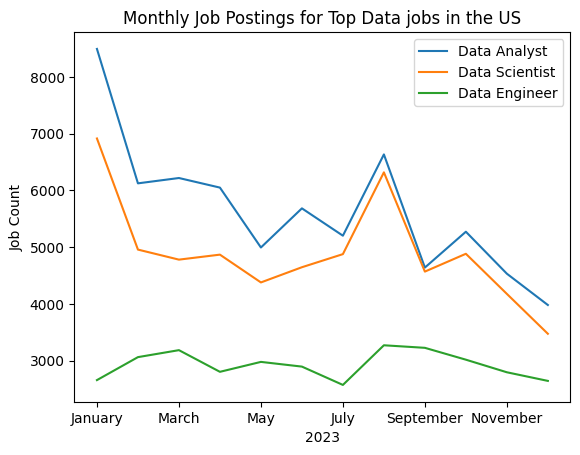

In [7]:
top_3 = df_us['job_title_short'].value_counts().head(3)
top_3 = top_3.index.tolist()
df_us_pivot[top_3].plot(kind='line')
plt.title('Monthly Job Postings for Top Data jobs in the US')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.legend()
plt.show()

Text(0, 0.5, 'Median Salaries')

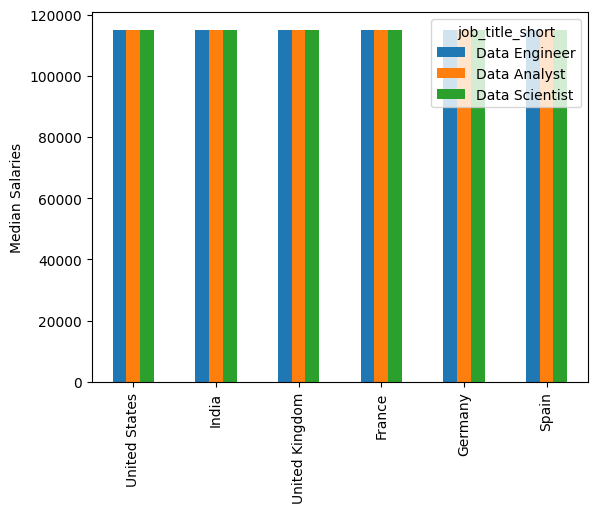

In [8]:
top_countries = df.job_country.value_counts().head(6).index
job_top_paid_countries = df.pivot_table(values='salary_year_avg', index='job_country', columns='job_title_short', aggfunc='median')
job_titles = ['Data Engineer', 'Data Analyst', 'Data Scientist']
job_top_paid_countries = job_top_paid_countries.loc[top_countries]
job_top_paid_countries = job_top_paid_countries[job_titles]
job_top_paid_countries.plot(kind='bar')
plt.xlabel('')
plt.ylabel('Median Salaries')

In [9]:
us_df_software_pivot = pd.read_csv('https://lukeb.co/software_csv', index_col='job_posted_month')
us_df_software_pivot

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [10]:
merge = df_us_pivot.merge(us_df_software_pivot, on='job_posted_month')

In [11]:
top_jobs = (
    merge.sum().sort_values(ascending=False).head().index.to_list()
)
top_jobs

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'Data Analyst',
 'Data Scientist']

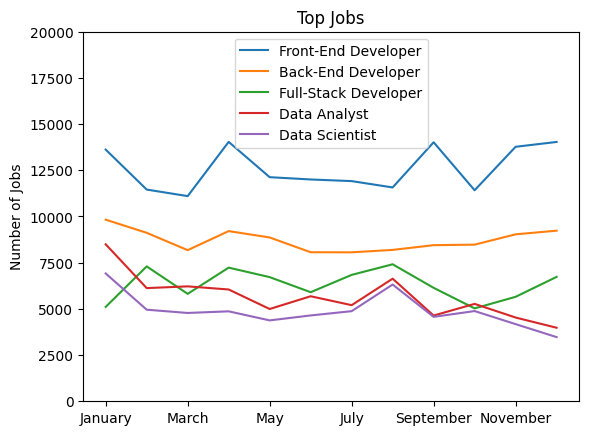

In [12]:
merge[top_jobs].plot(kind='line')
plt.title('Top Jobs')
plt.xlabel('')
plt.ylabel('Number of Jobs')
plt.ylim(0, 20000)
plt.legend()
plt.show()

<Axes: xlabel='job_posted_month'>

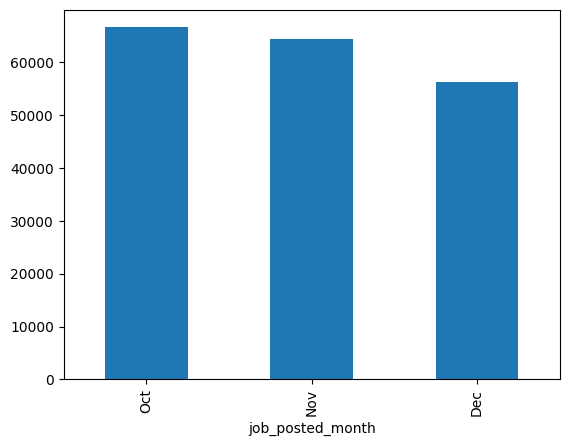

In [15]:
df['job_posted_month'] = df['job_posted_date'].dt.strftime('%b')
months = df['job_posted_month'].unique()
last_months = {month: df[df['job_posted_month']== month] for month in months}
last_quoter = pd.concat([last_months['Oct'], last_months['Nov'], last_months['Dec']], ignore_index=True)
last_quoter['job_posted_month'].value_counts().plot(kind='bar')